In [1]:
#STIX simulator

In [1]:
import sys
sys.path.append('.')
import glob
import numpy as np
import math
from core.grid_parameters import nominal as ngd


import matplotlib.pyplot as plt


from ipywidgets import interact, interact_manual, widgets


from IPython.display import clear_output

from core.stix_imager import StixImager
from core import stix_grid as sgd
from core import stix_cfl as cfl
from core import stix_detector as sdt
print(sdt.StixDetector.pixel_areas)

%matplotlib notebook

[9.6685 9.6685 9.6685 9.6685 9.6685 9.6685 9.6685 9.6685 0.903  0.903
 0.903  0.903 ]


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
def sim_cfl(sun_x,sun_y):
    cf=cfl.CFL()
    cf.project(sun_x,sun_y)
    cf.plot()

def sim(det_idx,
               sun_x=0,
               sun_y=0,
               user_phase_front=0,
               user_rot_deg_front=0,
               user_phase_rear=0,
               user_rot_deg_rear=0,
               compute_pattern=True):
    if det_idx==8:
        sim_cfl(sun_x,sun_y)
        return
    im=StixImager(det_idx)
    im.create( sun_x,
               sun_y,
               user_phase_front,
               user_rot_deg_front,
               user_phase_rear,
               user_rot_deg_rear)
    im.plot()

In [4]:



plt.close('all')
maxPhase= 0.457628#gd['26']['FrontPitch']
interact_manual(sim, det_idx=widgets.IntSlider(min=0,max=32,value=19,step=1),
         sun_x=widgets.IntSlider(min=-3600,max=3600,value=0, step=1),
         sun_y=widgets.IntSlider(min=-3600,max=3600,value=0,step=1),
         user_phase_front=widgets.IntSlider(min=-1,max=1,value=0, step=0.0001),
        user_phase_rear=widgets.IntSlider(min=-1,max=1,value=0, step=0.0001),
                
         user_rot_deg_front=widgets.IntSlider(min=-2,max=2,value=0,step=0.001),
        user_rot_deg_rear=widgets.IntSlider(min=-2,max=2,value=0,step=0.001),
        
         
        )

interactive(children=(IntSlider(value=19, description='det_idx', max=32), IntSlider(value=0, description='sun_…

<function __main__.sim(det_idx, sun_x=0, sun_y=0, user_phase_front=0, user_rot_deg_front=0, user_phase_rear=0, user_rot_deg_rear=0, compute_pattern=True)>

In [5]:
def sim_cfl(sun_x,sun_y):
    cf=cfl.CFL()
    cf.project(sun_x,sun_y)
    cf.plot()


In [6]:
plt.close('all')
maxPhase= 0.457628#gd['26']['FrontPitch']
interact_manual(sim_cfl, 
         sun_x=widgets.IntSlider(min=-3600,max=3600,value=0, step=1),
         sun_y=widgets.IntSlider(min=-3600,max=3600,value=0,step=1)
      
        
         
        )

interactive(children=(IntSlider(value=0, description='sun_x', max=3600, min=-3600), IntSlider(value=0, descrip…

<function __main__.sim_cfl(sun_x, sun_y)>

In [22]:
s=np.zeros((200,200))

In [25]:
s[120:122,20:22]=1

<IPython.core.display.Javascript object>


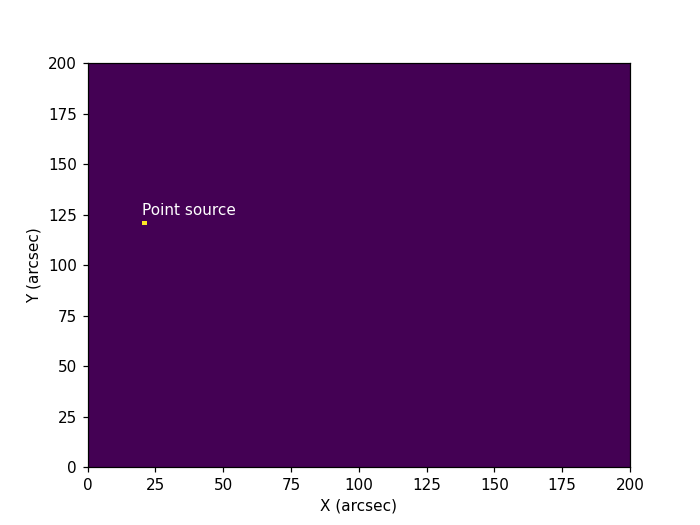

Text(20, 125, 'Point source')

In [30]:
fig=plt.figure()
plt.pcolormesh(s)
plt.xlabel('X (arcsec)')
plt.ylabel('Y (arcsec)')
plt.text(20,125, 'Point source', color='white')